
# Project: Investigating TMDb Movie Dataset Relationships

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. We'll be looking for ways to make correlations between certain variables given in an attempt to find ways to increase a movies revenue potential. While the original dataset contains many columns, we'll be removing many columns that are of no use to us. We'll be focused on the the following four columns.<br><br>
> **budget** - How much money did it cost to make the movie.<br>
> **revenue** - How much money the movie made.<br>
> **runtime** -  The length of the movie in minutes.<br>
> **vote_average** - The average of the votes collected for the movie.

### Questions for Analysis
> 1) Does the size of a movies budget correlate to more revenue generated by the movie?<br>
> 2) Does a higher vote average correlate to more revenue generated by the movie? <br>
> 3) Does the movies runtime correlate to more revenue generated by the movie?

**Setting up import statements for all the packages**

In [87]:
# Importing all my packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

**Loading the data and printing out a few lines to verify it loaded without error.**

In [88]:
# Loading dataset, verifying it loaded.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Displaying all columns to help identify columns that won't be needed for the data analysis.**

In [89]:
# Displaying all columns in dataset.
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

**Ensuring there are not any null values in the columns I plan to use for my analysis.**

In [90]:
# Searching for null values in specific columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning


**Dropping unneeded columns from the original dataset.**

In [91]:
# Dropping all columns except budget, revenue, runtime, and vote_average.
df.drop(['id', 'imdb_id', 'popularity', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 
       'overview', 'genres', 'production_companies', 'release_date',
       'vote_count', 'release_year', 'budget_adj',
       'revenue_adj'], axis=1, inplace=True)

**Verifying the columns were dropped and the needed columns are still present.**

In [92]:
# Verifying the right columns were dropped.
df.head()

,budget,revenue,runtime,vote_average
0,150000000,1513528810,124,6.5
1,150000000,378436354,120,7.1
2,110000000,295238201,119,6.3
3,200000000,2068178225,136,7.5
4,190000000,1506249360,137,7.3


**Looking for unusual values in the columns I'll be using.**

In [93]:
# Searching for unusual values (like 0 values).
df.describe()

,budget,revenue,runtime,vote_average
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,1.462570e+07,3.982332e+07,102.070863,5.974922
std,3.091321e+07,1.170035e+08,31.381405,0.935142
min,0.000000e+00,0.000000e+00,0.000000,1.500000
25%,0.000000e+00,0.000000e+00,90.000000,5.400000
50%,0.000000e+00,0.000000e+00,99.000000,6.000000
75%,1.500000e+07,2.400000e+07,111.000000,6.600000
max,4.250000e+08,2.781506e+09,900.000000,9.200000


**Removing unusual values**

In [94]:
# Removing 0 values from budget, revenue, and runtime columns.
df = df[df.budget != 0]
df = df[df.revenue != 0]
df = df[df.runtime != 0]

**Making sure the 0 values have been removed.**

In [95]:
# Making sure the 0 values have been removed from the columns.
df.describe()

,budget,revenue,runtime,vote_average
count,3.855000e+03,3.855000e+03,3855.000000,3855.00000
mean,3.720183e+07,1.076589e+08,109.215824,6.16786
std,4.220291e+07,1.765248e+08,19.922166,0.79504
min,1.000000e+00,2.000000e+00,15.000000,2.20000
25%,1.000000e+07,1.357645e+07,95.000000,5.70000
50%,2.400000e+07,4.479322e+07,106.000000,6.20000
75%,5.000000e+07,1.241530e+08,119.000000,6.70000
max,4.250000e+08,2.781506e+09,338.000000,8.40000


<a id='eda'></a>
## Exploratory Data Analysis

**Creating a function for future scatterplots.**

In [96]:
# This function takes the dataset and two variables and plots them on a scatterplot.
# It also cleans up the plot by formatting the labels.

def myScatterPlot(df,xVar,yVar):
    df.plot(kind='scatter',
           x=xVar,
           y=yVar,
           figsize=[8,5]);
    
    xVar=xVar.replace("_"," ")
    yVar=yVar.replace("_"," ")
    plt.title(f'Relationship between {yVar} and {xVar}'.title(), fontsize=14, weight='bold')
    plt.xlabel(xVar.title(), fontsize=10, weight='bold')
    plt.ylabel(yVar.title(), fontsize=10, weight='bold')

### 1) Does the size of a movies budget correlate to more revenue generated by the movie?

**Displaying the movies revenue data visually to visualize my dependant variable.**

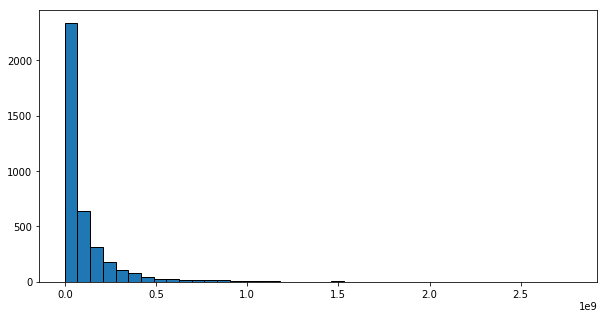

In [97]:
# Displayiing revenue on a histogram.
df.query('budget>0 and revenue>0')['revenue'].hist(grid=False, bins=40, edgecolor='black', figsize=[10, 5]);

We notice from the chart above that revenue is very skewed to the right.

**Displaying the movies budget data visually to help look for a trend**

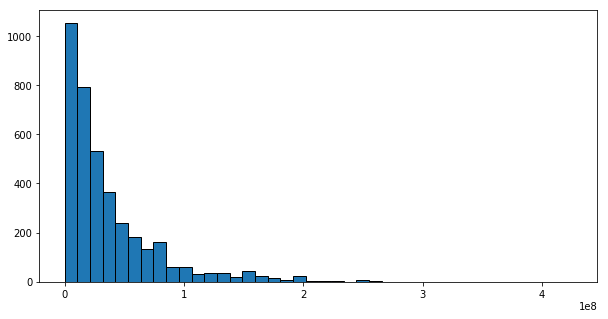

In [98]:
# Displaying budget on a histogram.
df.query('budget>0 and revenue>0')['budget'].hist(grid=False, bins=40, edgecolor='black', figsize=[10, 5]);

We notice from the chart above that budget is also very skewed to the right.

**Using a scatterplot to visualize the correlation between a movies budget and the revenue it made.**

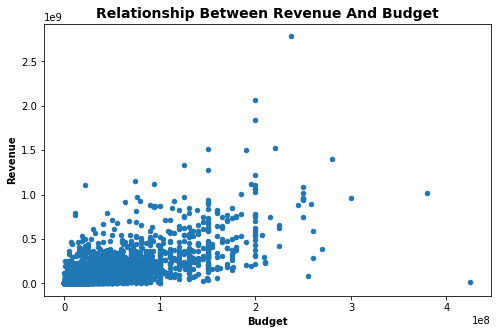

In [99]:
# Plotting budget and revenue on a scatterplot.
myScatterPlot(df.query('budget>0 and revenue>0'), 'budget', 'revenue')

From the above chart we can see there is a clear positive correlation between a movies budget and its revenue.

### 2) Does a higher vote average correlate to more revenue generated by the movie?

**Displaying the movies revenue data visually to visualize my dependant variable.**

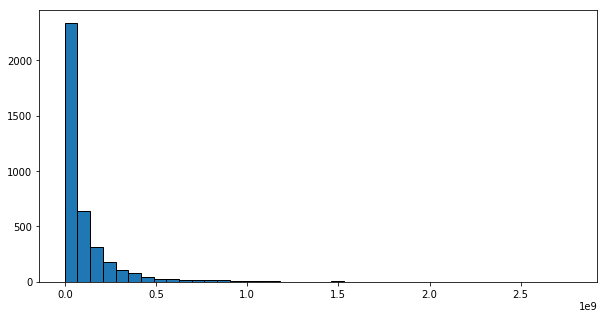

In [100]:
# Displaying revenue on a histogram.
df.query('vote_average>0 and revenue>0')['revenue'].hist(grid=False, bins=40, edgecolor='black', figsize=[10, 5]);

Again, looking above at revenue independantly we can see it's skewed to the right.

**Looking at the vote_average column looking for any obvious trend.**

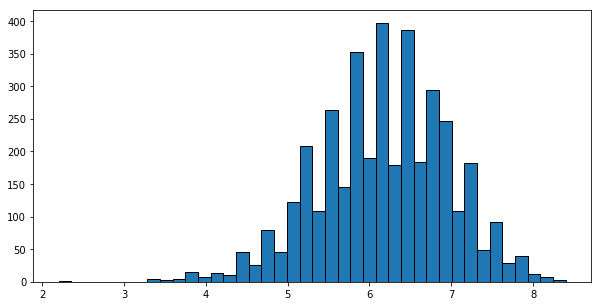

In [101]:
# Displaying vote_average on a histogram.
df.query('vote_average>0 and revenue>0')['vote_average'].hist(grid=False, bins=40, edgecolor='black', figsize=[10, 5]);

Looking at the chart above we notice a bell curve showing movies with a vote average of 5 to 7.5 performing best.

**Using a scatterplot to visualize the correlation between the vote average of a movie and the revenue it made.**

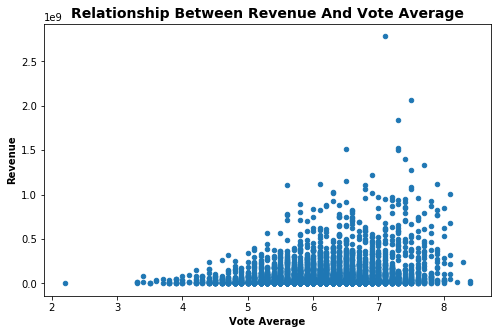

In [102]:
# Plotting vote_average and revenue on a scatterplot.
myScatterPlot(df.query('vote_average>0 and revenue>0'), 'vote_average', 'revenue')

The chart above is showing a positive correlation up to a vote average of aproximately 8. Then the revenue appears to decrease for movies with a vote average above 8.

**Using a bar chart to visualize the correlation between a movies budget and the revenue it made.**

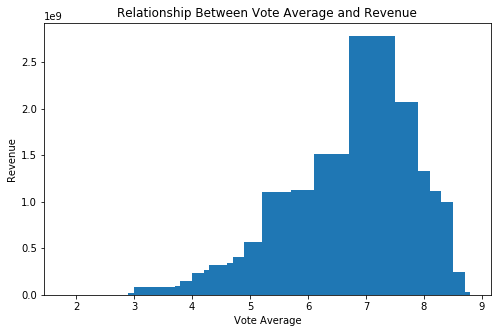

In [103]:
#Display the relationship between vote_average and revenue on a bar chart.
plt.figure(figsize=(8,5))
x = df.vote_average  
y = df.revenue 
plt.bar(x, y)
plt.title('Relationship Between Vote Average and Revenue')
plt.xlabel("Vote Average")
plt.ylabel("Revenue")
plt.show();

Above is a bar chart I used just to explore the data visually in a different form. It also confirms what the above scatterplot showed.

### 3) Does the movies runtime correlate to more revenue generated by the movie?

**Again looking at my revenue baseline prior to searching for a correlation as a refresher.**

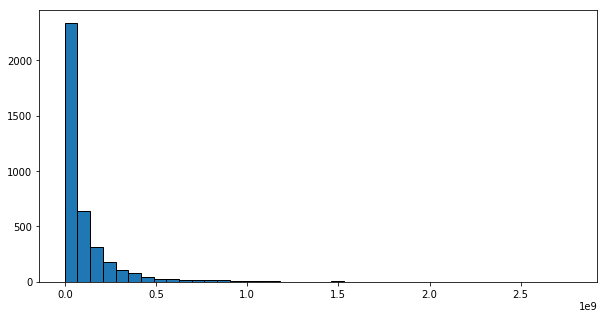

In [104]:
# Diplaying the revenue on a histogram.
df.query('runtime>0 and revenue>0')['revenue'].hist(grid=False, bins=40, edgecolor='black', figsize=[10, 5]);

Looking at the above independant variable revenue to refresh my memory before my next comparison.

**Displaying the runtime by itself looking for any noticeable trends prior to searching for a correlation.**

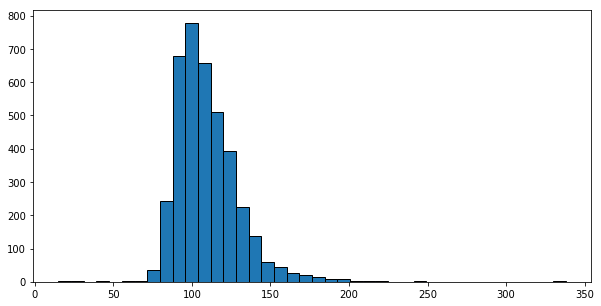

In [105]:
# Displaying the runtime on a histogram.
df.query('runtime>0 and revenue>0')['runtime'].hist(grid=False, bins=40, edgecolor='black', figsize=[10, 5]);

Displaying the runtime chart above looking for any noticable trends. It appears that movies between 80min and 175 min preform best.

**Using a scatterplot to visualize the correlation between a movies runtime and the revenue it made.**

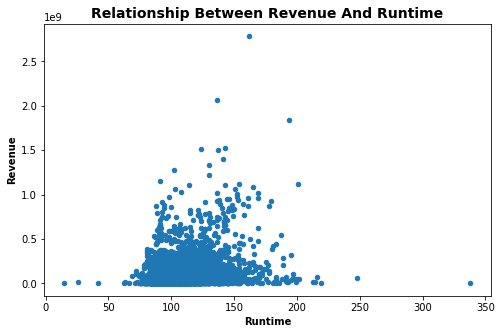

In [106]:
# Plotting the relationship between runtime and revenue on a scatterplot.
myScatterPlot(df.query('runtime>0 and revenue>0'), 'runtime', 'revenue')

Looking at the graph above I did not notice a super strong correlation between a movies runtime and its revenue. However very short and very long movies appear to do poorly at producing revenue.

<a id='conclusions'></a>
## Conclusions

> **1) Does the size of a movies budget correlate to more revenue generated by the movie?**<br>
> Looking at the graph above it is very clear that there is a positive correlation between a movies budget and how much revenue the movie will ultimately generate. Movies with small budgets typically don't do well from a revenue standpoint. On the other hand movies with a larger budget tend to do better. Often directly proportional to their budget.<br>

> **2) Does a higher vote average correlate to more revenue generated by the movie?** <br>
> According to the graphs above we can see that movies with a average vote of 5 to 7.5 typically bring in the most revenue. Movies under a 5 make very little revenue. One interesting finding that would need further investigating is why the revenue starts to decrease with average votes over 7.5.<br>

> **3) Does the movies runtime correlate to more revenue generated by the movie?**<br>
> After plotting the movies runtime against the movies revenue above I don't see a very strong correlation. The only place I see a strong correlation between the two is on the far ends of the runtime spectrum. Both very short movies and very long moves appear to bring in far less revenue then those between 80min to 175min. This seems to be the case generally speaking however there are a few outliers.<br>

### Limitation

> There is one limitation in regards to the correlation between vote average and the revenue the movie generated. I would have like to see exactly what criteria was used to collect the votes. Was it just a 1-10 scale where the indivual picked a single number? Was it several questions about the movie that was later translated into one number used for the indivuals vote? I think with more information we could possibly explain why there is a large dip in revenue for movies with an averaged vote above 8.

In [107]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0